In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
feature_metadata = json.load(open(f"v4.3/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))


feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

feature_set = feature_sets["medium"]

feature_stats 2376
feature_sets 17
targets 41
small 42
medium 705
all 2376


In [3]:
df = pd.read_parquet(
    f"v4.3/train_int8.parquet",
    columns=["era", "target"] + feature_set
)

print(len(df))

2420521


<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

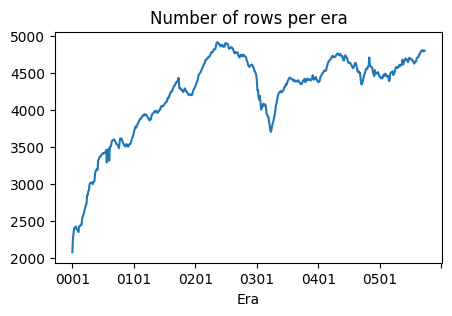

In [4]:
df.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

<Axes: title={'center': 'Number of rows per target'}, xlabel='Era'>

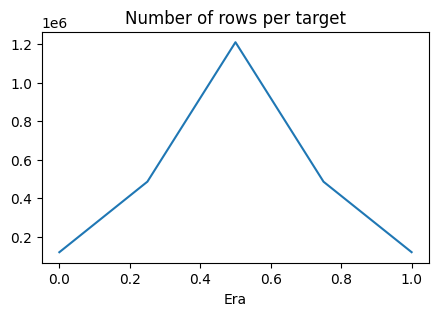

In [5]:
df.groupby("target").size().plot(
    title="Number of rows per target",
    figsize=(5, 3),
    xlabel="Era"
)

In [ ]:
print("Número de muestras por grupo en el DataFrame original:")
print(df.groupby(['era', 'target']).size())

# Calcular el número mínimo de muestras para cada valor único de 'mes'
min_samples_per_mes = df.groupby('era').apply(lambda x: x.groupby('target').size().min())

# Función para aplicar submuestreo a cada grupo dentro de un 'mes'
def balance_group(group, n_samples):
    return group.sample(n=n_samples, random_state=123)

# Aplicar el submuestreo a cada grupo dentro de cada 'mes'
def balance_groups(df):
    balanced_df = pd.DataFrame()
    for mes, group in df.groupby('era'):
        n_samples = min_samples_per_mes[mes]
        balanced_df = pd.concat([balanced_df, group.groupby('target').apply(lambda x: balance_group(x, n_samples)).reset_index(drop=True)])
    return balanced_df

df_balanced = balance_groups(df)

# Verificar el número de muestras por grupo en el DataFrame equilibrado
print("\nNúmero de muestras por grupo en el DataFrame equilibrado:")
print(df_balanced.groupby(['era', 'target']).size())

# Mostrar el DataFrame equilibrado
print("\nDataFrame equilibrado:")

In [ ]:
print(len(df_balanced))

In [ ]:
df_balanced.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

In [ ]:
df_balanced.groupby("target").size().plot(
    title="Number of rows per target",
    figsize=(5, 3),
    xlabel="Era"
)

In [ ]:
df_balanced["target"].plot(
  kind="hist",
  title="Target",
  figsize=(5, 3),
  xlabel="Value",
  density=True,
  bins=50
)

In [ ]:
del df
del min_samples_per_mes

df_balanced.to_json('datos_balanceados.json', orient='records', lines=True)